## Pre-processing

- Normal case (1)
- Lower case (2)
- Normal case, no punctuation (3)
- Lower case, no punctuation (4)
- Normal case, no stopwords (5)
- Lower case, no stopwords (6)
- Normal,  no stopwords, no punct (7)
- ⁠Lower case, no stopwords, no punct (8)
- Normal case, no stopwords, lemmatization (9)
- Normal case, lemmatization (10)
- Normal case, separate contraction (11)

In [ ]:
# libraries
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.metrics import f1_score, accuracy_score, precision_score, classification_report, confusion_matrix, roc_auc_score
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
from nltk.stem import WordNetLemmatizer
import numpy as np
import string
import csv
import sys
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
punctuations = set(string.punctuation)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
from google.colab import drive
drive.flush_and_unmount()

#### If you want to run the code then run this, else can load the preprocessed data by running the code after these codes

In [ ]:
# import data here
# should change the data path

train_data_path = '/content/drive/MyDrive/cs4248_project/datasets/fulltrain.csv'
test_data_path = '/content/drive/MyDrive/cs4248_project/datasets/balancedtest.csv'

train_data = pd.read_csv(train_data_path,header = None,names=['category', 'text'])
test_data = pd.read_csv(test_data_path,header = None,names=['category', 'text'])


# split sentence
def split_sentence(text):
    sentences = sent_tokenize(text, language='english')
    return sentences

train_data['tokenized_sentence'] = train_data['text'].apply(split_sentence)
test_data['tokenized_sentence'] = test_data['text'].apply(split_sentence)

train_data = train_data.drop('text', axis=1)
test_data = test_data.drop('text', axis=1)

In [ ]:
train_data

,category,tokenized_sentence
0,1,"[A little less than a decade ago, hockey fans ..."
1,1,[The writers of the HBO series The Sopranos to...
2,1,[Despite claims from the TV news outlet to off...
3,1,[After receiving 'subpar' service and experien...
4,1,[After watching his beloved Seattle Mariners p...
...,...,...
48849,4,[The ruling Kuomintang (KMT) has claimed owner...
48850,4,[The Taipei city government has encouraged the...
48851,4,[President Ma Ying-jeou said Friday that a par...
48852,4,[The families of the four people who were kill...


In [ ]:
#preprocessing way1: Normal case
def preprocess_text(sentences):
    tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
    return tokenized_sentences

#preprocessing way2: Lower case
def preprocess_text(sentences):
    tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
    lowercased_sentences = [[word.lower() for word in sentence] for sentence in tokenized_sentences]
    return lowercased_sentences

#preprocessing way3: Normal case, no punctuation
def preprocess_text(sentences):
    tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
    cleaned_sentences = [
        [word for word in sentence if not all(char in punctuations for char in word)]
        for sentence in tokenized_sentences
    ]
    return cleaned_sentences

#preprocessing way4: Lower case, no punctuation
def preprocess_text(sentences):
    tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
    cleaned_sentences = [
        [word.lower() for word in sentence if not all(char in punctuations for char in word)]
        for sentence in tokenized_sentences
    ]
    return cleaned_sentences

#preprocessing way5: Normal case, no stopwords
def preprocess_text(sentences):
    tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
    cleaned_sentences = [
        [word for word in sentence if word not in stop_words]
        for sentence in tokenized_sentences
    ]
    return cleaned_sentences

# preprocessing way6: Lower case, no stopwords
def preprocess_text(text):

    tokenized_sentences = sent_tokenize(text)
    new_text = []
    for sentence in tokenized_sentences:
        tokenized_words = word_tokenize(sentence)
        new_sentence = []
        for word in tokenized_words:
            lower_word = word.lower()
            if lower_word not in stop_words:
                new_sentence.append(lower_word)
        new_text.append(new_sentence)
    return new_text

# preprocessing way7: Normal, no stopwords, no punct
def remove_punc(text):
    text = word_tokenize(text)
    translator = str.maketrans('', '', string.punctuation)
    punchless_bunch = [word.translate(translator) for word in text if word.translate(translator)]
    return punchless_bunch


def preprocess_text(text):
    tokenized_sentences = sent_tokenize(text)
    new_text = []
    for sentence in tokenized_sentences:
        tokenized_words = remove_punc(sentence)
        new_sentence = []
        for word in tokenized_words:
            if word not in stop_words:
                new_sentence.append(word)
        new_text.append(new_sentence)
    return new_text

# preprocessing way8: Lower case, no stopwords, no punct
def remove_punc(text):
    text = text.lower()
    text = word_tokenize(text)
    translator = str.maketrans('', '', string.punctuation)
    punchless_bunch = [word.translate(translator) for word in text if word.translate(translator)]
    return punchless_bunch


def preprocess_text(text):
    tokenized_sentences = sent_tokenize(text)
    new_text = []
    for sentence in tokenized_sentences:
        tokenized_words = remove_punc(sentence)
        new_sentence = []
        for word in tokenized_words:
            if word not in stop_words:
                new_sentence.append(word)
        new_text.append(new_sentence)
    return new_text

# preprocessing way9: Normal case, no stopwords, lemmatization
def preprocess_text(text):
    tokenized_sentences = sent_tokenize(text)
    new_text = []
    for sentence in tokenized_sentences:
        tokenized_words = word_tokenize(sentence)
        new_sentence = []
        for word in tokenized_words:
            if word not in stop_words:
                lemmatized_word = lemmatizer.lemmatize(word)
                new_sentence.append(lemmatized_word)
        new_text.append(new_sentence)
    return new_text

# preprocessing way10: Normal case, lemmatization
def preprocess_text(text):
    tokenized_sentences = sent_tokenize(text)
    new_text = []
    for sentence in tokenized_sentences:
        tokenized_words = word_tokenize(sentence)
        new_sentence = []
        for word in tokenized_words:
            lemmatized_word = lemmatizer.lemmatize(word)
            new_sentence.append(lemmatized_word)
        new_text.append(new_sentence)
    return new_text

# preprocessing way11: Normal case, separate contraction

contractions = {
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"here's": "here is",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

def expand_contractions_sentence(sentence, contractions):
    for contraction, expansion in contractions.items():
        pattern = re.compile(re.escape(contraction), re.IGNORECASE)
        sentence = pattern.sub(expansion, sentence)
    return sentence

def preprocess_text(text):
    sentences = sent_tokenize(text)
    processed_sentences = [expand_contractions_sentence(sentence, contractions) for sentence in sentences]
    return processed_sentences

## Load preprocessed data below

In [ ]:
# train_data_path = '/content/drive/MyDrive/preprocessed_data/raw_data/fulltrain.csv'
# test_data_path = '/content/drive/MyDrive/preprocessed_data/raw_data/balancedtest.csv'

# train_data = pd.read_csv(train_data_path,header = None,names=['category', 'text'])
# test_data = pd.read_csv(test_data_path,header = None,names=['category', 'text'])


#David's path (uncomment to change to urs)
train_data_path = '/content/drive/MyDrive/cs4248_project/processed_data/way7_train.pkl'
test_data_path = '/content/drive/MyDrive/cs4248_project/processed_data/way7_test.pkl'

train_data = pd.read_pickle(train_data_path)
test_data = pd.read_pickle(test_data_path)

#--------------------------------------------------------------------------------------



FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/cs4248_project/processed_data/way7_train.pkl'

In [ ]:
#if pd.read_csv not work, you can try the following
# Increase the maximum field size limit
csv.field_size_limit(sys.maxsize)

trainData = []
with open('fulltrain.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    for row in reader:
        trainData.append(row)

df = pd.DataFrame(trainData, columns=['Label', 'Text'])


testData = []
with open('balancedtest.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    for row in reader:
        testData.append(row)

# Convert to DataFrame
df2 = pd.DataFrame(testData, columns=['Label', 'Text'])

print(df.shape[0])
print(df2.shape[0])

In [ ]:
print(train_data['category'].value_counts())

category
3    17870
1    14047
4     9995
2     6942
Name: count, dtype: int64


In [ ]:
print(test_data['category'].value_counts())

category
1    750
2    750
3    750
4    750
Name: count, dtype: int64


In [ ]:
#save data
train_data.to_csv('/content/drive/MyDrive/preprocessed_data/way1/train_data.csv',index =False)
test_data.to_csv('/content/drive/MyDrive/preprocessed_data/way1/test_data.csv',index = False)

In [ ]:
#data path
train_1_path = '/content/drive/MyDrive/preprocessed_data/way1/train_data.csv'
test_1_path = '/content/drive/MyDrive/preprocessed_data/way1/test_data.csv'

train_1_data = pd.read_csv(train_1_path)
test_1_data = pd.read_csv(test_1_path)

In [ ]:
print(train_1_data['category'].value_counts())

3    17870
1    14047
4     9995
2     6942
Name: category, dtype: int64


In [ ]:
print(train_1_data.isnull().sum())

category    0
text        0
New_Text    0
dtype: int64


## Embedding

In [ ]:
import numpy as np
import pandas as pd

from tqdm import tqdm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from gensim.models import KeyedVectors

class Embedding:
    def __init__(self, doc_embed=True, max_seq_len=100):
        self.doc_embed = doc_embed
        self.max_seq_len = max_seq_len
        self.pca = PCA(n_components=self.max_seq_len)

        if self.doc_embed:
            self.dim_size = 300
            #self.model = KeyedVectors.load('/content/drive/MyDrive/cs4248_project/embeddings/cc.en.300.kv')
            self.model = KeyedVectors.load('/content/drive/MyDrive/cs4248_project/embeddings/glove.kv')
        else:
            self.dim_size = 100
            self.model = KeyedVectors.load('/content/drive/MyDrive/cs4248_project/embeddings/cc.en.100.kv')

    '''
    flags
    ------
    tfidf: tf-idf weighted word embeddings
    sentiment: valence score weighted word embeddings
    tfidf_clip: only used for concatenated embeddings (doc_embed=False); clips doc embeddings by using only the top n=max_seq_len words
    pca: only used for concatenated embeddings (doc_embed=False); uses PCA to reduce dimensionality along word axis
    flatten: only used for concatenated embeddings (doc_embed=False); flattens embedding to 1D
    '''
    def get_embedding(self, docs, tfidf=False, sentiment=False, tfidf_clip=False, pca=False, flatten=False):
        embedded_docs = []
        flattened = [[j for sub in doc for j in sub] for doc in docs.iloc[:,-1]]

        if tfidf:
            vectorizer = TfidfVectorizer(min_df=0, max_df=9999999, lowercase=False, token_pattern=r'(?u)(?<!\S)\S+(?!\S)')
            tfidf_scores = vectorizer.fit_transform([' '.join(arr) for arr in flattened])

        if sentiment:
            vader = SentimentIntensityAnalyzer()

        for j, doc in tqdm(docs.iterrows(), total=docs.shape[0]):
            doc_embedding = []
            tfidf_weights = []
            sentiment_weights = []
            tokens = flattened[j]

            if sentiment:
                sentences = doc.iloc[-2]
                sent_tokens = doc.iloc[-1]
                for i, sentence in enumerate(sentences):
                    score = vader.polarity_scores(sentence)['compound']
                    if score == 0:
                        score = 0.1 # smooth neutral sentences
                    if self.doc_embed:
                        score = abs(score) # abs to make weight positive and prevent 0 sum when getting mean
                    if tfidf:
                        n = len([tok for tok in sent_tokens[i] if tok in self.model and tok in vectorizer.vocabulary_])
                    else:
                        n = len([tok for tok in sent_tokens[i] if tok in self.model])
                    sentiment_weights += [score] * n

            if tfidf:
                for i, token in enumerate(tokens):
                    if token in self.model and token in vectorizer.vocabulary_:
                        tfidf_weights.append(tfidf_scores[j, vectorizer.vocabulary_[token]])

            if tfidf or sentiment:
                if tfidf and not sentiment:
                    weights = tfidf_weights
                elif sentiment and not tfidf:
                    weights = sentiment_weights
                else: # tfidf and sentiment
                    weights = [a*b for a,b in zip(tfidf_weights, sentiment_weights)]
                total_weight = sum(weights)

            if self.doc_embed:
                for token in tokens:
                    if token in self.model:
                        doc_embedding.append(self.model[token])

                if len(doc_embedding) == 0:
                    doc_embedding = np.zeros((self.dim_size,))
                else:
                    if tfidf or sentiment:
                        doc_embedding = np.average(doc_embedding, axis=0, weights=weights)
                    else:
                        doc_embedding = np.mean(doc_embedding, axis=0)
            else:
                if tfidf or sentiment:
                    k = 0
                    weights = [w / total_weight for w in weights]
                    if tfidf:
                        for token in tokens:
                            if token in self.model and token in vectorizer.vocabulary_:
                                doc_embedding.append(self.model[token] * weights[k])
                                k += 1
                    else:
                        for token in tokens:
                            if token in self.model:
                                doc_embedding.append(self.model[token] * weights[k])
                                k += 1
                else:
                    for token in tokens:
                        if token in self.model:
                            doc_embedding.append(self.model[token])

                if len(doc_embedding) == 0:
                    if flatten:
                        doc_embedding = np.zeros((self.max_seq_len * self.dim_size))
                    else:
                        doc_embedding = np.zeros((self.max_seq_len, self.dim_size))
                else:
                    doc_embedding = self.pad(doc_embedding, tfidf_weights, tfidf_clip, pca, flatten)

            embedded_docs.append(doc_embedding)

        return embedded_docs


    def pad(self, doc, weights, tfidf_clip=False, pca=False, flatten=True):
        if len(doc) < self.max_seq_len:
            doc = np.array(doc)
            zeros = np.zeros((self.max_seq_len - len(doc), self.dim_size))
            doc = np.vstack((doc, zeros))
        elif len(doc) > self.max_seq_len:
            if tfidf_clip and len(weights) > 0:
                #print('tfidf clipping')
                doc = np.array(self.tfidf_clip(doc, weights))
            elif pca:
                doc = np.array(doc).T
                doc = self.pca.fit_transform(doc)
                #print('pca clipping')
                doc = doc.T
            else:
                #print('normal clipping')
                doc = np.array(doc[:self.max_seq_len])
        else:
            doc = np.array(doc)

        return doc.flatten() if flatten else doc


    def tfidf_clip(self, doc, weights):
        new_doc = []
        sorted = weights.copy()
        sorted.sort(reverse=True)
        min_weight = sorted[self.max_seq_len-1]

        for i in range(len(doc)):
            if weights[i] >= min_weight and len(new_doc) < self.max_seq_len:
                new_doc.append(doc[i])

        return new_doc


    def save_embedding(self, docs, tfidf=False, sentiment=False, tfidf_clip=False, pca=False, flatten=False, path=None):
        embedded_docs = self.get_embedding(docs, tfidf, sentiment, tfidf_clip, pca, flatten)
        new_docs = docs.drop(docs.columns[-len(docs.columns)+1:], axis=1, inplace=False)
        new_docs['embeddings'] = embedded_docs

        if path:
            new_docs.to_pickle(path)
        else:
            string = f'{"doc" if self.doc_embed else "concat"}{"_tfidf" if tfidf else ""}{"_sent" if sentiment else ""}{"_tfidfClip" if tfidf_clip else ""}{"_pca" if pca else ""}{"_flat" if flatten else ""}.pkl'
            new_docs.to_pickle(string)


In [ ]:
import pandas as pd

# will take a minute or two to load vectors
# for doc embedding of dimensions (num_samples, 300)
embed = Embedding(doc_embed=True, max_seq_len=100)


In [ ]:
import pandas as pd

# will take a minute or two to load vectors
# for doc embedding of dimensions (num_samples, max_seq_len, 100)
embed = Embedding(doc_embed=False, max_seq_len=100)


In [ ]:
#df = pd.read_pickle('/content/drive/MyDrive/processed_datasets_cs4248/way1_test.pkl')

# get embeddings
train = embed.get_embedding(train_data, tfidf=False, sentiment=False, tfidf_clip=False, pca=False)
test = embed.get_embedding(test_data, tfidf=False, sentiment=False, tfidf_clip=False, pca=False)


100%|██████████| 3000/3000 [00:04<00:00, 650.89it/s]


In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/cs4248_project/processed_data/way12_test.pkl')
#embed.save_embedding(df, tfidf=False, sentiment=False, path='/content/drive/MyDrive/cs4248_project/embeddings/doc_glove/way12_test_doc.pkl')
embed.save_embedding(df, tfidf=True, sentiment=False, path='/content/drive/MyDrive/cs4248_project/embeddings/doc_glove/way12_test_doc_tfidf.pkl')
embed.save_embedding(df, tfidf=False, sentiment=True, path='/content/drive/MyDrive/cs4248_project/embeddings/doc_glove/way12_test_doc_sent.pkl')
embed.save_embedding(df, tfidf=True, sentiment=True, path='/content/drive/MyDrive/cs4248_project/embeddings/doc_glove/way12_test_doc_tfidf_sent.pkl')


100%|██████████| 3000/3000 [00:52<00:00, 57.39it/s]


In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/cs4248_project/processed_data/way13_test.pkl')
#embed.save_embedding(df, tfidf=False, sentiment=False, path='/content/drive/MyDrive/cs4248_project/embeddings/doc_glove/way13_test_doc.pkl')
embed.save_embedding(df, tfidf=True, sentiment=False, path='/content/drive/MyDrive/cs4248_project/embeddings/doc_glove/way13_test_doc_tfidf.pkl')
embed.save_embedding(df, tfidf=False, sentiment=True, path='/content/drive/MyDrive/cs4248_project/embeddings/doc_glove/way13_test_doc_sent.pkl')
embed.save_embedding(df, tfidf=True, sentiment=True, path='/content/drive/MyDrive/cs4248_project/embeddings/doc_glove/way13_test_doc_tfidf_sent.pkl')


100%|██████████| 3000/3000 [00:51<00:00, 58.05it/s]


In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/cs4248_project/processed_data/way12_train.pkl')
#embed.save_embedding(df, tfidf=False, sentiment=False, path='/content/drive/MyDrive/cs4248_project/embeddings/doc_glove/way12_train_doc.pkl')
embed.save_embedding(df, tfidf=True, sentiment=False, path='/content/drive/MyDrive/cs4248_project/embeddings/doc_glove/way12_train_doc_tfidf.pkl')
embed.save_embedding(df, tfidf=False, sentiment=True, path='/content/drive/MyDrive/cs4248_project/embeddings/doc_glove/way12_train_doc_sent.pkl')
embed.save_embedding(df, tfidf=True, sentiment=True, path='/content/drive/MyDrive/cs4248_project/embeddings/doc_glove/way12_train_doc_tfidf_sent.pkl')


100%|██████████| 48854/48854 [15:16<00:00, 53.33it/s] 


In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/cs4248_project/processed_data/way13_train.pkl')
#embed.save_embedding(df, tfidf=False, sentiment=False, path='/content/drive/MyDrive/cs4248_project/embeddings/doc_glove/way13_train_doc.pkl')
embed.save_embedding(df, tfidf=True, sentiment=False, path='/content/drive/MyDrive/cs4248_project/embeddings/doc_glove/way13_train_doc_tfidf.pkl')
embed.save_embedding(df, tfidf=False, sentiment=True, path='/content/drive/MyDrive/cs4248_project/embeddings/doc_glove/way13_train_doc_sent.pkl')
embed.save_embedding(df, tfidf=True, sentiment=True, path='/content/drive/MyDrive/cs4248_project/embeddings/doc_glove/way13_train_doc_tfidf_sent.pkl')


100%|██████████| 48854/48854 [08:56<00:00, 91.10it/s] 


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
'''
Embeddings can be found here:
/content/drive/MyDrive/processed_datasets_cs4248/embeddings

doc embeddings (num_samples, 300)
--------------------------------------------
/content/drive/MyDrive/processed_datasets_cs4248/embeddings/doc
/content/drive/MyDrive/processed_datasets_cs4248/embeddings/doc_tfidf
/content/drive/MyDrive/processed_datasets_cs4248/embeddings/doc_sent
/content/drive/MyDrive/processed_datasets_cs4248/embeddings/doc_tfidf_sent

tfidf: tf-idf weighted
sent: sentiment weighted
tfidf_sent: both


concat embeddings (num_samples, 200, 100)
--------------------------------------------
/content/drive/MyDrive/processed_datasets_cs4248/embeddings/doc/concat

'''

In [ ]:
train_array = np.array(train)
test_array = np.array(test)
np.save('/content/drive/My Drive/cs4248_project/embeddings/train_way7.npy', train_array)
np.save('/content/drive/My Drive/cs4248_project/embeddings/test_way7.npy', test_array)

## Models

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.model_selection import train_test_split
#‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’

base_path = '/content/drive/MyDrive/cs4248_project/embeddings/doc_w2v/'
way = 'way7'

train_data2 = pd.read_pickle(f'{base_path}{way}_train_doc.pkl')
test_data2 = pd.read_pickle(f'{base_path}{way}_test_doc.pkl')


#for way 6-11, change 'category' to 'Label'
train2 = train_data2['embeddings']
test2 = test_data2['embeddings']

y = train_data2['Label'].astype(int)
y2 = test_data2['Label'].astype(int)

# y = train_data2['category']
# y2 = test_data2['category']


X_train, X_test, y_train, y_test = train_test_split(train2, y, test_size=0.25, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(test2, y2, test_size=0.25, random_state=42)

X_train_flat = np.concatenate(X_train.values)
X_test2_flat = np.concatenate(X_test2.values)

X_train_flat = X_train_flat.reshape(len(X_train), -1)
X_test2_flat = X_test2_flat.reshape(len(X_test2), -1)

# min_value = np.min(X_train_flat)
# shift_value = abs(min_value) if min_value < 0 else 0

# X_train_shifted = X_train_flat + shift_value
# X_test_shifted = X_test2_flat + shift_value

pac = GaussianNB()
# X_train_shifted
pac.fit(X_train_flat,y_train)

GaussianNB()

In [ ]:
y_pred = pac.predict(X_test2_flat)

acc = accuracy_score(y_test2, y_pred)
acc = accuracy_score(y_test2, y_pred)
score = f1_score(y_test2, y_pred, average='micro')
classify = classification_report(y_test2, y_pred)

print('score on validation = {}'.format(score))
print('score on accuracy = {}'.format(acc))
print('classfication report = {}'.format(classify))

score on validation = 0.5626666666666666
score on accuracy = 0.5626666666666666
classfication report =               precision    recall  f1-score   support

           1       0.48      0.50      0.49       200
           2       0.52      0.76      0.62       185
           3       0.67      0.40      0.51       178
           4       0.68      0.58      0.63       187

    accuracy                           0.56       750
   macro avg       0.59      0.56      0.56       750
weighted avg       0.58      0.56      0.56       750



### Bert

In [ ]:
# pip install transformers

In [ ]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizerFast, AutoModel

#‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’

base_path = '/content/drive/MyDrive/cs4248_project/embeddings/doc_w2v/'
way = 'way7'

train_data2 = pd.read_pickle(f'{base_path}{way}_train_doc.pkl')
test_data2 = pd.read_pickle(f'{base_path}{way}_test_doc.pkl')


#for way 6-11, change 'category' to 'Label'
train2 = train_data2['embeddings']
test2 = test_data2['embeddings']

y = train_data2['Label'].astype(int)
y2 = test_data2['Label'].astype(int)

# y = train_data2['category']
# y2 = test_data2['category']


X_train, X_test, y_train, y_test = train_test_split(train2, y, test_size=0.2, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(test2, y2, test_size=0.2, random_state=42)

X_train_flat = np.concatenate(X_train.values)
X_train2_flat = np.concatenate(X_train2.values)
X_test2_flat = np.concatenate(X_test2.values)

X_train_flat = X_train_flat.reshape(len(X_train), -1)
X_train2_flat = X_train2_flat.reshape(len(X_train2), -1)
X_test2_flat = X_test2_flat.reshape(len(X_test2), -1)


bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
X_train_flat

array([[-0.03903151,  0.0622579 ,  0.00368602, ..., -0.02185267,
         0.08219492,  0.01165268],
       [ 0.01871996,  0.03515002,  0.00644678, ..., -0.01738133,
         0.03611112, -0.03606717],
       [-0.05454301,  0.06354701,  0.04913   , ...,  0.01040529,
         0.05820785, -0.02638536],
       ...,
       [-0.09863281, -0.32421875, -0.18359375, ..., -0.26171875,
         0.05004883, -0.26367188],
       [ 0.04457702,  0.07639483,  0.01971005, ..., -0.03051542,
         0.062351  , -0.026701  ],
       [ 0.03588466,  0.04042066,  0.03650536, ..., -0.05013757,
         0.09530168,  0.01127993]])

In [ ]:
# Tokenize and encode sequences in the train set
tokens_train = tokenizer.batch_encode_plus(
    X_train_flat.tolist(),
    padding='longest',
    truncation=True
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    X_train2_flat.tolist(),
    padding='longest',
    truncation=True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    X_test2_flat.tolist(),
    padding='longest',
    truncation=True
)

TypeError: TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
#‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’

base_path = '/content/drive/MyDrive/cs4248_project/embeddings/doc_w2v/'
way = 'way7'

train_data2 = pd.read_pickle(f'{base_path}{way}_train_doc.pkl')
test_data2 = pd.read_pickle(f'{base_path}{way}_test_doc.pkl')


#for way 6-11, change 'category' to 'Label'
train2 = train_data2['embeddings']
test2 = test_data2['embeddings']

#smote = SMOTE(sampling_strategy={2: 6200}, random_state=4248)

y = train_data2['Label'].astype(int)
y2 = test_data2['Label'].astype(int)

# y = train_data2['category']
# y2 = test_data2['category']


X_train, X_test, y_train, y_test = train_test_split(train2, y, test_size=0.25, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(test2, y2, test_size=0.25, random_state=42)


X_train_flat = np.concatenate(list(X_train.values))
X_test2_flat = np.concatenate(list(X_test2.values))

X_train_flat = X_train_flat.reshape(len(X_train), -1)
X_test2_flat = X_test2_flat.reshape(len(X_test2), -1)

#X_train_res, y_train_res = smote.fit_resample(X_train_flat, y_train)

# print(Counter(y_train))

logreg = LogisticRegression(max_iter=1000, C=1.2)
logreg.fit(X_train_flat, y_train)

LogisticRegression(C=1.2, max_iter=1000)

In [ ]:
y_pred = logreg.predict(X_test2_flat)

acc = accuracy_score(y_test2, y_pred)
score = f1_score(y_test2, y_pred, average='macro')
classify = classification_report(y_test2, y_pred)
cm = confusion_matrix(y_test2, y_pred)
y_pred_proba = logreg.predict_proba(X_test2_flat)
roc_auc = roc_auc_score(y_test2, y_pred_proba, multi_class='ovo')


print('score on validation = {}'.format(score))
print('score on accuracy = {}'.format(acc))
print('classfication report = {}'.format(classify))
print('ROC-AUC score:', roc_auc)

score on validation = 0.7268671977247558
score on accuracy = 0.7346666666666667
classfication report =               precision    recall  f1-score   support

           1       0.80      0.74      0.77       200
           2       0.74      0.46      0.57       185
           3       0.60      0.84      0.70       178
           4       0.84      0.89      0.87       187

    accuracy                           0.73       750
   macro avg       0.75      0.74      0.73       750
weighted avg       0.75      0.73      0.73       750

ROC-AUC score: 0.9114314008324252


Text(50.722222222222214, 0.5, 'Truth')

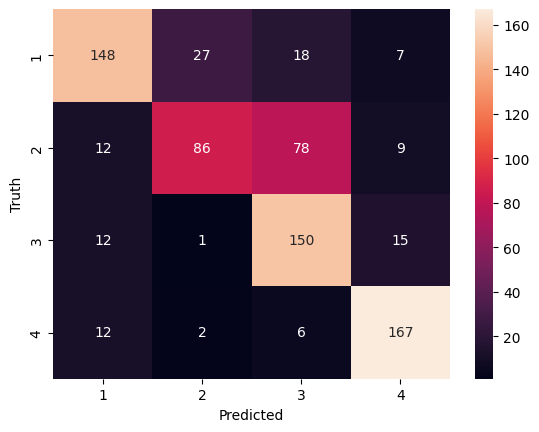

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sb
class_labels = [1, 2, 3, 4]
sb.heatmap(cm, annot=True, fmt='d',  xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
row_counts = y_train.value_counts()
row_counts

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’

base_path = '/content/drive/MyDrive/cs4248_project/embeddings/doc_w2v/'
way = 'way7'

train_data2 = pd.read_pickle(f'{base_path}{way}_train_doc.pkl')
test_data2 = pd.read_pickle(f'{base_path}{way}_test_doc.pkl')


#for way 6-11, change 'category' to 'Label'
train2 = train_data2['embeddings']
test2 = test_data2['embeddings']

y = train_data2['Label'].astype(int)
y2 = test_data2['Label'].astype(int)


X_train, X_test, y_train, y_test = train_test_split(train2, y, test_size=0.25, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(test2, y2, test_size=0.25, random_state=42)

X_train_flat = np.concatenate(X_train.values)
X_test2_flat = np.concatenate(X_test2.values)

X_train_flat = X_train_flat.reshape(len(X_train), -1)
X_test2_flat = X_test2_flat.reshape(len(X_test2), -1)


DT = DecisionTreeClassifier()
DT.fit(X_train_flat,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = DT.predict(X_test2_flat)

acc = accuracy_score(y_test2, y_pred)
acc = accuracy_score(y_test2, y_pred)
score = f1_score(y_test2, y_pred, average='macro')
classify = classification_report(y_test2, y_pred)
y_pred_proba = logreg.predict_proba(X_test2_flat)
roc_auc = roc_auc_score(y_test2, y_pred_proba, multi_class='ovr')

print('score on validation = {}'.format(score))
print('score on accuracy = {}'.format(acc))
print('classfication report = {}'.format(classify))
print('ROC-AUC score:', roc_auc)

NameError: name 'DT' is not defined

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’

base_path = '/content/drive/MyDrive/cs4248_project/embeddings/doc_w2v/'
way = 'way7'

train_data2 = pd.read_pickle(f'{base_path}{way}_train_doc.pkl')
test_data2 = pd.read_pickle(f'{base_path}{way}_test_doc.pkl')


#for way 6-11, change 'category' to 'Label'
train2 = train_data2['embeddings']
test2 = test_data2['embeddings']

y = train_data2['Label'].astype(int)
y2 = test_data2['Label'].astype(int)


X_train, X_test, y_train, y_test = train_test_split(train2, y, test_size=0.25, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(test2, y2, test_size=0.25, random_state=42)

X_train_flat = np.concatenate(X_train.values)
X_test2_flat = np.concatenate(X_test2.values)

X_train_flat = X_train_flat.reshape(len(X_train), -1)
X_test2_flat = X_test2_flat.reshape(len(X_test2), -1)

smote = SMOTE(sampling_strategy={1: 13401, 2: 13401, 4: 13401}, random_state=4248)

X_train_res, y_train_res = smote.fit_resample(X_train_flat, y_train)

#print(Counter(y_train))

rf = RandomForestClassifier(n_estimators=200, random_state=42)


rf.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_pred = rf.predict(X_test2_flat)

acc = accuracy_score(y_test2, y_pred)
acc = accuracy_score(y_test2, y_pred)
score = f1_score(y_test2, y_pred, average='macro')
classify = classification_report(y_test2, y_pred)
y_pred_proba = rf.predict_proba(X_test2_flat)
roc_auc = roc_auc_score(y_test2, y_pred_proba, multi_class='ovo')

print('score on validation = {}'.format(score))
print('score on accuracy = {}'.format(acc))
print('classfication report = {}'.format(classify))
print('ROC-AUC score:', roc_auc)

score on validation = 0.7111814421866571
score on accuracy = 0.7146666666666667
classfication report =               precision    recall  f1-score   support

           1       0.75      0.66      0.70       200
           2       0.67      0.54      0.60       185
           3       0.64      0.85      0.73       178
           4       0.82      0.82      0.82       187

    accuracy                           0.71       750
   macro avg       0.72      0.72      0.71       750
weighted avg       0.72      0.71      0.71       750

ROC-AUC score: 0.8963901255323101


### MLP

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, average_precision_score

from copy import deepcopy
import random
import warnings
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from torch.nn import Linear
from torch.nn.functional import dropout
from torch.utils.data import Dataset, DataLoader

WV_SIZE = 300
N_CLASSES = 4

###############################
########## MLP MODEL ##########
###############################

class MLP(torch.nn.Module):
    def __init__(self, nHiddenChannels1, nHiddenChannels2):
        super().__init__()
        self.lin1 = Linear(WV_SIZE, nHiddenChannels1)
        self.lin2 = Linear(nHiddenChannels1, nHiddenChannels2)
        self.lin3 = Linear(nHiddenChannels2, N_CLASSES)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = self.lin2(x)
        x = x.relu()
        x = self.lin3(x)

        x = dropout(x, p=0.5, training=self.training)
        return x

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
    def __len__(self):
        return self.data.shape[0]
    def __getitem__(self, ind):
        x = self.data[ind]
        y = self.labels[ind]
        return x, y

###############################
######### MAIN METHOD #########
###############################

def run_mlp(train_data, test_data, nEpochs=3, lr=0.00005):
    warnings.filterwarnings("ignore")

    # Initialise
    model = MLP(nHiddenChannels1=800, nHiddenChannels2=400) # set number of hidden nodes in each layer here
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    softmax = torch.nn.Softmax(dim=0)

    # y = train_data['Label']
    # y2 = test_data['Label']

    # X_train, x_val, y_train, y_val = train_test_split(train, y, test_size=0.2, random_state=42)

    # X_test, _, y_test, _ = train_test_split(test, y2, test_size=0.2, random_state=42)

    freqCutOff = int(len(train_data.index)*0.8)
    x_train, x_val, x_test = train_data['embeddings'][:freqCutOff], train_data['embeddings'][freqCutOff:], test_data['embeddings']
    y_train, y_val, y_test = train_data.iloc[:, 0][:freqCutOff] - 1, train_data.iloc[:, 0][freqCutOff:] - 1, train_data.iloc[:, 0] - 1

    # Helper functions for training, testing, and generating word vectors
    def train(loader):
        model.train()
        losses = []
        for data in loader:
            x, y = data[0], data[1]

            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())

        return losses

    def test(loader):
        model.eval()
        pred, probs, labels = [], [], []
        for data in loader:
            x, y = data[0], data[1]

            out = model(x)
            for i in out:
                probs.append(softmax(i).tolist())
                pred.append(torch.argmax(i).item())
            labels.extend(y)

        print(len(labels))
        print(len(pred))
        with torch.no_grad():
            f1, precision, recall, acc = f1_score(labels, pred, average='macro'), precision_score(labels, pred, average='macro'), recall_score(labels, pred, average='macro'), accuracy_score(labels, pred)
        return f1, precision, recall, acc

    print("Starting training...")

    losses = []
    f1s, precisions, recalls, accs = [], [], [], []

    val_dataset = CustomDataset(torch.tensor(np.stack(x_val.to_numpy()), dtype=torch.float32), torch.tensor(y_val.to_numpy(), dtype=torch.long))
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
    for i in range(nEpochs):
        curr_xtrain, curr_ytrain = deepcopy(x_train), deepcopy(y_train)
        c = list(zip(curr_xtrain, curr_ytrain))
        random.shuffle(c)
        curr_xtrain, curr_ytrain = zip(*c)
        train_dataset = CustomDataset(torch.tensor(curr_xtrain, dtype=torch.float32), torch.tensor(curr_ytrain, dtype=torch.long))
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

        currLosses = train(train_loader)
        losses.extend(currLosses)
        minLoss, avgLoss = min(losses), sum(losses)/len(losses)

        f1, precision, recall, acc = test(val_loader)
        f1s.append(f1); precisions.append(precision); recalls.append(recall); accs.append(acc);

        print(f'''Val Scores.
                Epoch: {i} | Min Train Loss: {minLoss} | Avg Train Loss: {avgLoss}
                Accuracy: {acc:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}''')

    # Generate prediction on test data
    test_dataset = CustomDataset(torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)
    f1, precision, recall, acc = test(test_loader)
    print(f'''Test Scores.
            Accuracy: {acc:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}''')

    # Visualisation of loss.
    losses_float = [float(loss) for loss in losses]
    loss_indices = [i for i,l in enumerate(losses_float)]
    d = {'indices': np.array(loss_indices), 'loss': np.array(losses_float)}
    pdnumsqr = pd.DataFrame(d)
    sns.lineplot(x='indices', y='value', hue='variable', data=pd.melt(pdnumsqr, ['indices']))
    # plt.ylim(0, 20)
    plt.show()

    # Visualisation of performance
    epoch = [i for i in range(nEpochs)]
    d = {'epoch': np.array(epoch), 'F1': np.array(f1s), 'Precision': np.array(precisions), 'Recall': np.array(recalls), 'Accuracy': np.array(accs)}
    pdnumsqr = pd.DataFrame(d)
    sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(pdnumsqr, ['epoch']))
    plt.show()


Starting training...
9771
9771
Val Scores.
                Epoch: 0 | Min Train Loss: 0.5676051378250122 | Avg Train Loss: 1.0061668846298941
                Accuracy: 0.0000 | Precision: 0.0000 | Recall: 0.0000 | F1: 0.0000
9771
9771
Val Scores.
                Epoch: 1 | Min Train Loss: 0.34795495867729187 | Avg Train Loss: 0.8563073753408246
                Accuracy: 0.0000 | Precision: 0.0000 | Recall: 0.0000 | F1: 0.0000
9771
9771
Val Scores.
                Epoch: 2 | Min Train Loss: 0.13708992302417755 | Avg Train Loss: 0.7812261816075573
                Accuracy: 0.0000 | Precision: 0.0000 | Recall: 0.0000 | F1: 0.0000
3000
3000
Test Scores.
            Accuracy: 0.4487 | Precision: 0.3333 | Recall: 0.1496 | F1: 0.2065


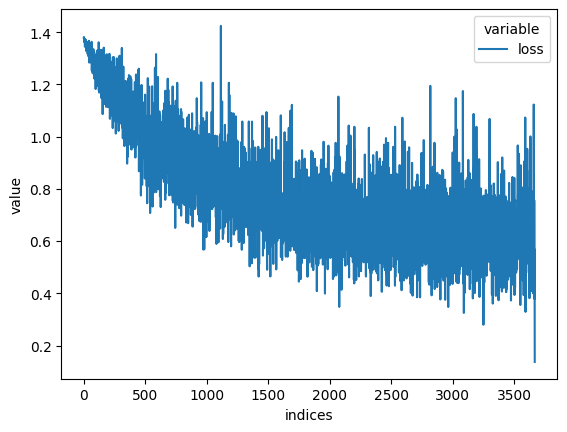

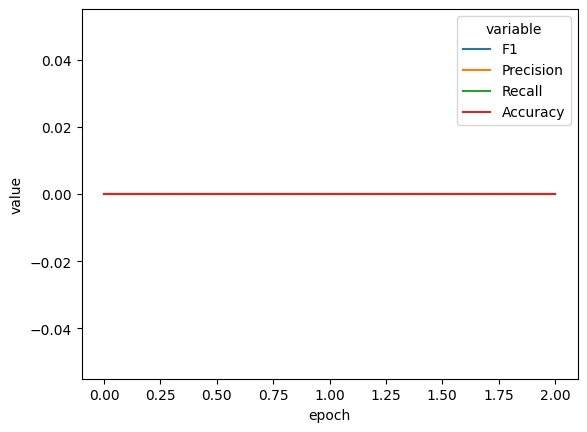

In [ ]:
base_path = '/content/drive/MyDrive/cs4248_project/embeddings/doc/'
way = 'way7'

train_data = pd.read_pickle(f'{base_path}{way}_train_doc.pkl')
test_data = pd.read_pickle(f'{base_path}{way}_test_doc.pkl')

train_data['Label'] = train_data['Label'].astype(int)
test_data['Label'] = test_data['Label'].astype(int)
run_mlp(train_data, test_data)

In [ ]:
run_mlp(train_data, test_data, train, test)

Starting training...


AttributeError: 'list' object has no attribute 'to_numpy'

### LSTM

### TextCNN

In [ ]:
import keras
from keras import Input, Model
from keras.preprocessing import sequence
from keras.models import load_model
from keras.layers import Conv1D, MaxPooling1D, concatenate
from keras.layers.embeddings import Embedding
from keras.layers.core import Dense, Dropout, Flatten

#vocab_size = ...
embedding_dim = 300
num_classes = 4
filter_sizes = [3, 4, 5]
num_filters = 100
learning_rate = 1e-3
batch_size = 64
num_epochs = 10

# embedding_weights: (vocab_size, embedding_dim)
# x_train: (48852, fix_len) each row is the index of a sentence. ex "I like nlp"-> [12, 222, 111]
def train_textcnn(vocab_size, embedding_weights, x_train, y_train):
    main_input = Input(shape=(maxlen,), dtype='float64')
    embedder = Embedding(output_dim=embedding_dim,
                         input_dim=vocab_size,
                         input_length=maxlen,
                         weights=[embedding_weights])
    embed = embedder(main_input)
    cnn1 = Conv1D(256, 3, padding='same', strides=1, activation='relu')(embed)
    cnn1 = MaxPooling1D(pool_size=38)(cnn1)
    cnn2 = Conv1D(256, 4, padding='same', strides=1, activation='relu')(embed)
    cnn2 = MaxPooling1D(pool_size=37)(cnn2)
    cnn3 = Conv1D(256, 5, padding='same', strides=1, activation='relu')(embed)
    cnn3 = MaxPooling1D(pool_size=36)(cnn3)

    cnn = concatenate([cnn1, cnn2, cnn3], axis=-1)
    flat = Flatten()(cnn)
    drop = Dropout(0.5)(flat)
    main_output = Dense(4, activation='softmax')(drop)

    model = Model(inputs=main_input, outputs=main_output)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epoch, verbose=2)

    model.save('textcnn.h5')

    result = model.predict(x_test)

    result_labels = np.argmax(result, axis=1)

    y_predict = list(map(str, result_labels))

    print('accuracy, metrics.accuracy_score(y_test, y_predict))

train_textcnn(n_symbols, embedding_weights, x_train, y_train)

### BiLSTM

### Transformer